In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [2]:
data = pd.read_csv("Demographic_Data.csv")

# * Task 1: Investigate Customer Buying Patterns *

# Section 3: Obtaining Data and Preprocessing Data

In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 80000 entries, 0 to 79999
Data columns (total 5 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   in-store  80000 non-null  int64  
 1   age       80000 non-null  int64  
 2   items     80000 non-null  int64  
 3   amount    80000 non-null  float64
 4   region    80000 non-null  int64  
dtypes: float64(1), int64(4)
memory usage: 3.1 MB


In [4]:
data.describe()

,in-store,age,items,amount,region
count,80000.000000,80000.000000,80000.000000,80000.000000,80000.000000
mean,0.500000,45.757925,4.504975,835.919670,2.675000
std,0.500003,15.715679,2.061238,721.273736,1.126672
min,0.000000,18.000000,1.000000,5.004700,1.000000
25%,0.000000,33.000000,3.000000,285.140000,2.000000
50%,0.500000,45.000000,4.000000,582.315000,3.000000
75%,1.000000,56.000000,6.000000,1233.700000,4.000000
max,1.000000,85.000000,8.000000,3000.000000,4.000000


# Original Dataframe (needs to be cleaned and modified)

In [5]:
data.head()

,in-store,age,items,amount,region
0,0,37,4,281.03,2
1,0,35,2,219.51,2
2,1,45,3,1525.70,4
3,1,46,3,715.25,3
4,1,33,4,1937.50,1


In [6]:
# need to remove duplicate values as they can cause error in analysis

data.duplicated().value_counts()

False    79979
True        21
dtype: int64

In [7]:
# removes duplicate values from the dataframe, leading a reduction in the RangeIndex range

# having duplicate values may result in errors in math being done on the data

data = data.drop_duplicates()

In [8]:
# checks if there are any missing values in the dataset

# in this case, there are no missing values

data.isnull().sum()

in-store    0
age         0
items       0
amount      0
region      0
dtype: int64

In [9]:
# even though "region" and "in-store" are technically categorical variables, they need to retain their integer datatype label
# so that Machine Learning functions can be applied onto them (particularly relevant for the "region" column)
 
data.dtypes

in-store      int64
age           int64
items         int64
amount      float64
region        int64
dtype: object

In [10]:
# EDIT: this was original code; this code is no longer being used but will remain in the notebook for note-taking purposes

# converts the "In-store" and "Region" columns into dummy variables with a str data type

# renames the newly formatted columns based on their particular values

# new_data = pd.get_dummies(data, columns=["in-store","region"], dtype=str)
# new_data.rename({"region_1":"North"}, axis=1, inplace=True)
# new_data.rename({"region_2":"South"}, axis=1, inplace=True)
# new_data.rename({"region_3":"East"}, axis=1, inplace=True)
# new_data.rename({"region_4":"West"}, axis=1, inplace=True)
# new_data.rename({"in-store_0":"Online Purchases"}, axis=1, inplace=True)
# new_data.rename({"in-store_1": "In-store Purchases"}, axis=1, inplace=True)

# displays correctly converted and formatted data

# new_data.head() 

In [11]:
# this cell won't be run because, based on mentor feedback, the "in-store" and "region" variables need to retain their integer
# datatpye label so that Machine Learning functions (such as Decision Trees) can be applied to them

# code reflecting mentor feedback -- using Label Encoding -- this method simplifies the data unlike using both the get_dummies and rename functions

# this changes the data type of the "in-store" and "region" columns to be categorical instead of numerical

# this means that math cannot be done on these columns

#data[["in-store", "region"]] = data[["in-store", "region"]].astype("category")

In [12]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 79979 entries, 0 to 79999
Data columns (total 5 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   in-store  79979 non-null  int64  
 1   age       79979 non-null  int64  
 2   items     79979 non-null  int64  
 3   amount    79979 non-null  float64
 4   region    79979 non-null  int64  
dtypes: float64(1), int64(4)
memory usage: 3.7 MB


# Modified Dataframe (duplicate values removed + no null values)

In [13]:
# confirms that there are no duplicate values in the Modified Dataframe

data.duplicated().value_counts()

False    79979
dtype: int64

In [14]:
# confirms that there are no null values in the Modified Dataframe

data.isnull().sum()

in-store    0
age         0
items       0
amount      0
region      0
dtype: int64

# Section 4: Explore the Data: Exploratory Data Analysis (EDA)


In [15]:
header = data.dtypes.index
header

Index(['in-store', 'age', 'items', 'amount', 'region'], dtype='object')

## EDA on the Modified Dataframe

In [16]:
# basically equal number of people who purchased items "in-store" versus "online"

data["in-store"].value_counts()

1    39990
0    39989
Name: in-store, dtype: int64

In [17]:
#average age of person in the dataset

#confirmed by applying the describe() function on the data

data["age"].mean().round()

46.0

In [18]:
# ages 32 to 54 are the top 10 most occuring ages 

# may indicate that working-aged individuals purchased more items generally


data["age"].value_counts().head(10)

53    1829
32    1788
42    1784
36    1784
34    1783
46    1775
54    1773
39    1771
50    1769
47    1768
Name: age, dtype: int64

In [19]:
# ages 18 and 75 to 85 are the bottom 10 least occuring ages 

# may indicate that working-aged individuals purchased more items generally

data["age"].value_counts().tail(10)

84    373
81    371
78    369
77    363
80    344
75    334
76    327
79    320
18    223
85    185
Name: age, dtype: int64

In [20]:
# may indicate that most purchases involved between 2 to 7 items

# this is basically confirmed when the describe() function is applied to the data

# 68492 total items refer to purchase amounts between 2 to 7

# 11487 total items refer to purchase amounts of 1 and 8

# 68492 + 11487 = 79979 (number of elements of corrected dataset)

data["items"].value_counts()

4    11594
6    11519
3    11486
7    11376
2    11284
5    11233
8     5788
1     5699
Name: items, dtype: int64

In [21]:
# about 85% of purchases involved item amounts between 2 and 7
# the remaining 15% of purchases involved item amounts of 1 or 8

data["items"].value_counts(normalize=True).round(3) * 100



4    14.5
6    14.4
3    14.4
7    14.2
2    14.1
5    14.0
8     7.2
1     7.1
Name: items, dtype: float64

In [22]:
# nearly 26k people are from the West region
# nearly 20k people are from the South region
# 18k people are from the East region
# nearly 16k people are from the North region

data["region"].value_counts()

4    25988
2    19994
3    18000
1    15997
Name: region, dtype: int64

In [23]:
# nearly 1/3 of purchases came from the West region

# nearly 1/2 of purchases came from the South and East regions when combined

data["region"].value_counts(normalize=True).round(2) * 100

4    32.0
2    25.0
3    23.0
1    20.0
Name: region, dtype: float64

In [24]:
records = len(data)
records

79979

In [25]:
# displays the top 100 lowest (least) "amount" values along with "items"

data_s = data.nsmallest(records, ["amount", "items"]).head(100)
data_s["region"].value_counts()

2    100
Name: region, dtype: int64

In [26]:
# displays the top 100 highest (greatest) "amount" values along with "items"

data_l = data.nlargest(records, ["amount", "items"]).head(100)
data_l["region"].value_counts()

4    63
3    37
Name: region, dtype: int64

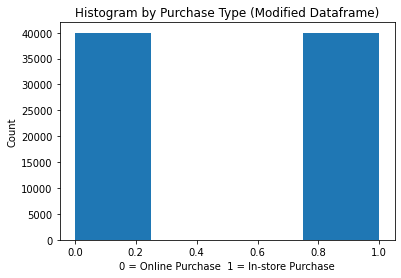

In [27]:
# no discernible difference between amount of purchases made, given type

plt.hist(data["in-store"], bins=4)
plt.title("Histogram by Purchase Type (Modified Dataframe)")
plt.xlabel("0 = Online Purchase  1 = In-store Purchase")
plt.ylabel("Count")
plt.show()

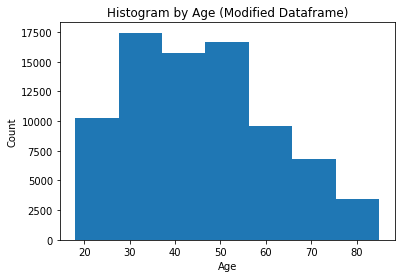

In [28]:
# most purchases were made by people between the ages of 30 and about 55

# further detail may be shown by increasing the number of bins

plt.hist(data["age"], bins=7)
plt.title("Histogram by Age (Modified Dataframe)")
plt.xlabel("Age")
plt.ylabel("Count")
plt.show()

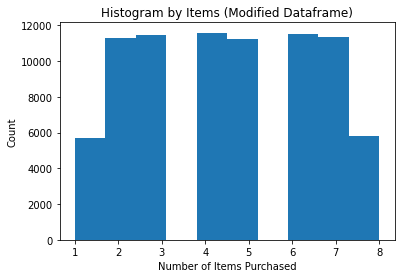

In [29]:
# not too helpful a visualization, but it clearly shows that a majority of item amounts were between 2 and 7

plt.hist(data["items"], bins=10)
plt.title("Histogram by Items (Modified Dataframe)")
plt.xlabel("Number of Items Purchased")
plt.ylabel("Count")
plt.show()

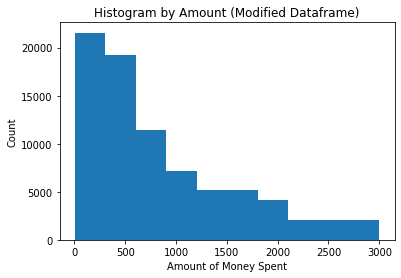

In [30]:
# large portion of purchases were valued between 0 and 500 dollars.

plt.hist(data["amount"], bins=10)
plt.title("Histogram by Amount (Modified Dataframe)")
plt.xlabel("Amount of Money Spent")
plt.ylabel("Count")
plt.show()

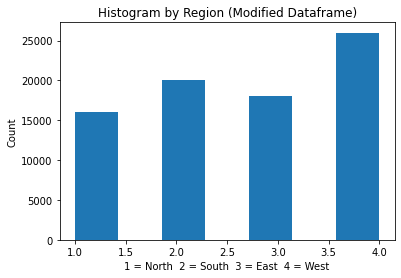

In [31]:
# overall, this indicates that the West region is more represented in the Modified Dataframe than other regions

plt.hist(data["region"], bins=7)
plt.title("Histogram by Region (Modified Dataframe)")
plt.xlabel("1 = North  2 = South  3 = East  4 = West")
plt.ylabel("Count")
plt.show()

In [32]:
# kept for note-taking purposes, but not necessary for EDA purposes

# there appears to be some outliers

# mid-range (30-55) populations tend to spend more while older (60+) populations tend to spend less


# data_sample = data.sample(100)

# x = data_sample["age"]
# y = data_sample["amount"]


# plt.scatter(x, y, marker="o")
# plt.title("Scatter plot of Age and Amount based on Randomized Sample of Data (Modified Dataframe)")
# plt.xlabel("Age")
# plt.ylabel("Amount")
# plt.show()

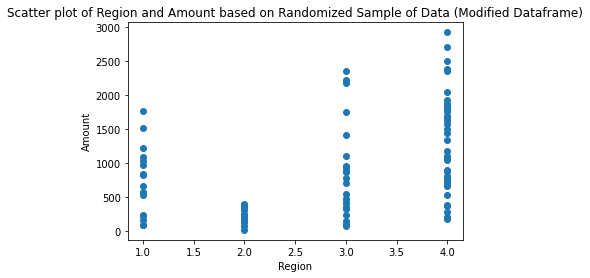

In [33]:
# note based on Group Meeting - scatter plots *should not* include categorical data, such as what "region" represents 

data_sample = data.sample(100)

x = data_sample["region"]
y = data_sample["amount"]


plt.scatter(x, y, marker="o")
plt.title("Scatter plot of Region and Amount based on Randomized Sample of Data (Modified Dataframe)")
plt.xlabel("Region")
plt.ylabel("Amount")
plt.show()

In [34]:
# kept for note-taking purposes, but not necessary for EDA purposes

# data_sample = data.sample(100)

# x = data_sample["items"]
# y = data_sample["amount"]


# plt.scatter(x, y, marker="o")
# plt.title("Scatter plot of Items and Amount based on Randomized Sample of Data (Modified Dataframe)")
# plt.xlabel("Items")
# plt.ylabel("Amount")
# plt.show()

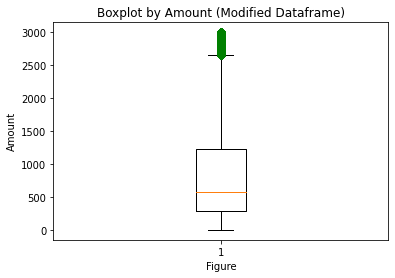

In [35]:
# see the describe() function for precise breakdowns of the lower, median and upper quartiles

A = data["amount"]

plt.boxplot(A, 0, "gD")
plt.title("Boxplot by Amount (Modified Dataframe)")
plt.xlabel("Figure")
plt.ylabel("Amount")
plt.show()

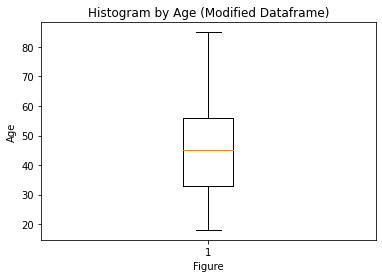

In [36]:
# see the describe() function for precise breakdowns of the lower, median and upper quartiles

B = data["age"]

plt.boxplot(B, 0, "gD")
plt.title("Histogram by Age (Modified Dataframe)")
plt.xlabel("Figure")
plt.ylabel("Age")
plt.show()

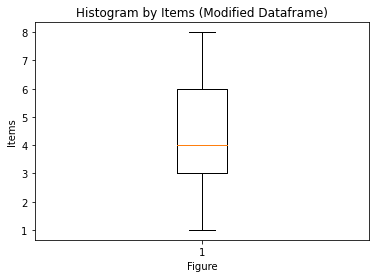

In [37]:
# see the describe() function for precise breakdowns of the lower, median and upper quartiles

C = data["items"]

plt.boxplot(C, 0, "gD")
plt.title("Histogram by Items (Modified Dataframe)")
plt.xlabel("Figure")
plt.ylabel("Items")
plt.show()

In [38]:
# correlation graph for the Modified Dataframe

# variables that have weak correlations with all other variables: "in-store" + "age" + "items"

# the "amount" variable appears moderately correlated with the "region" variable (0.40)

# for this reason, the "amount" versus "region" correlation could be a potential feature for Model Development

corr_mat = data.corr()

corr_mat

,in-store,age,items,amount,region
in-store,1.000000,-0.178180,-0.003897,-0.085573,-0.133171
age,-0.178180,1.000000,0.000657,-0.282033,-0.235370
items,-0.003897,0.000657,1.000000,0.000384,-0.001904
amount,-0.085573,-0.282033,0.000384,1.000000,0.403486
region,-0.133171,-0.235370,-0.001904,0.403486,1.000000


In [39]:
# covariance graph for the Modified Dataframe

# the "age" and "amount" variables have a strong negative covariance (-3196.78)
# this means that as one variable increases, the other variable strongly decreases

# the "items" and "amount" variables have a moderate covariance (0.57)
# this means that as one variable increases, the other variable moderately increases

# the "amount" and "region" variables have a strong covariance (327.87)
# this means that as one variable increases, the other variable strongly increases

# the "amount" and "region" covariance value would make for a good feature for Model Development
# this is because those two variables are what we are trying to understand more about

# it may also be worth considering as a feature the "age" and "amount" covariance value
# this is because strong negative relationships help us to understand which variables "work against" each other

cov_mat = data.cov()

cov_mat

,in-store,age,items,amount,region
in-store,0.250003,-1.400071,-0.004017,-30.860425,-0.075019
age,-1.400071,246.966189,0.021270,-3196.782841,-4.167305
items,-0.004017,0.021270,4.248751,0.570791,-0.004421
amount,-30.860425,-3196.782841,0.570791,520221.252295,327.874873
region,-0.075019,-4.167305,-0.004421,327.874873,1.269321


In [40]:
# displays the regions's respective counts for the smallest "amount" values from the Modified Dataframe based on 10000 elements

# clearly indicates that the South region is over-represented for low "amount" values

data.nsmallest(10000, "amount")["region"].value_counts()

2    6162
1    1460
3    1411
4     967
Name: region, dtype: int64

In [41]:
# displays the regions's respective counts for the largest "amount" values from the Modified Dataframe based on 10000 elements

# clearly indicates that the West region is over-representated for high "amount" values

data.nlargest(10000, "amount")["region"].value_counts()

4    6491
3    2844
1     665
Name: region, dtype: int64

In [42]:
# displays the region's respective counts for the smallest "item" values from the Modified Dataframe based on 10000 elements

data.nsmallest(10000, "items")["region"].value_counts()

4    3357
2    2489
3    2218
1    1936
Name: region, dtype: int64

In [43]:
# displays the region's respective counts for the largest "item" values from the Modified Dataframe based on 10000 elements

data.nlargest(10000, "items")["region"].value_counts()

4    3261
2    2506
3    2241
1    1992
Name: region, dtype: int64

## EDA aggregation (grouping the "amount" data by "region" and then applying the sum() function) --> fundamental answer to the first question (which region spends the most/least)

In [167]:
# this groups the "amount" column values by their respective regions and 
# then displays the sum of each region's "amount" columns.

# It is important to understand that there is more data in the West region than any other region.

# Because there is a non-equal amount of entries per region, 

# This clearly shows that the West region is the most profitable region and the South region is the least profitable.

pd.options.display.float_format = '{:.2f}'.format

# the above code reformats how the float data is displayed. It basically converts the float values from scientific notation 
# into standard decimal form, including two decimal places

summed_data = data[["amount", "region"]].groupby("region").sum()


# the code below 

first_print = "Total Amount values per Region.\n"
second_print = "\nWe clearly see that the West region was the most profitable while the South region was the least profitable."

print(first_print, "\n", summed_data, "\n", second_print)

Total Amount values per Region.
 
             amount
region            
1      11917620.05
2       5040442.24
3      16523453.47
4      33366990.02 
 
We clearly see that the West region was the most profitable while the South region was the least profitable.


## EDA on the (LQD) Lower Quartile Dataframe (sub-selection of the Modified Dataframe)

In [45]:
# this dataframe is generated by making a sub-selection from the Modified Dataframe
# based on a conditional statement, which seeks to find data elements where
# the amount values are less than or equal to the lower quartile (<= 25%)

# this is done so that I can analyze data points that correspond to the lower-bound values asssociated with the
# "items" and amount" columns based on the "region" column 

lower_quartile = 285.12

data_lower = data[["age", "items", "amount", "region"]][data["amount"] <= lower_quartile]
data_lower.describe()

,age,items,amount,region
count,19995.000000,19995.000000,19995.000000,19995.000000
mean,51.386247,4.503426,156.248918,2.243611
std,16.668361,2.059028,75.990171,0.851079
min,18.000000,1.000000,5.004700,1.000000
25%,38.000000,3.000000,92.953500,2.000000
50%,50.000000,4.000000,158.310000,2.000000
75%,65.000000,6.000000,221.290000,3.000000
max,85.000000,8.000000,285.110000,4.000000


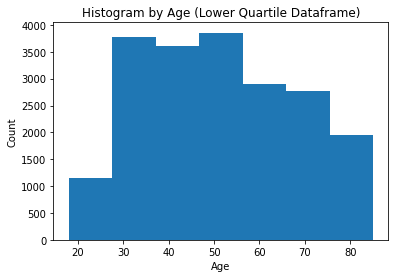

In [46]:
plt.hist(data_lower["age"], bins=7)
plt.title("Histogram by Age (Lower Quartile Dataframe)")
plt.xlabel("Age")
plt.ylabel("Count")
plt.show()

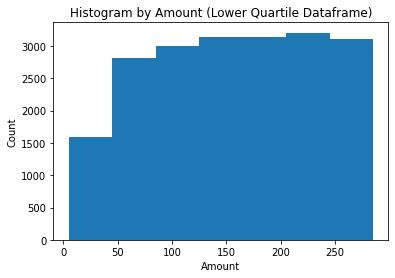

In [47]:
plt.hist(data_lower["amount"], bins=7)
plt.title("Histogram by Amount (Lower Quartile Dataframe)")
plt.xlabel("Amount")
plt.ylabel("Count")
plt.show()

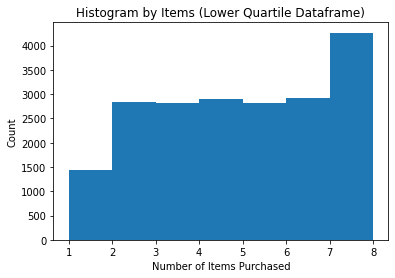

In [48]:
plt.hist(data_lower["items"], bins=7)
plt.title("Histogram by Items (Lower Quartile Dataframe)")
plt.xlabel("Number of Items Purchased")
plt.ylabel("Count")
plt.show()

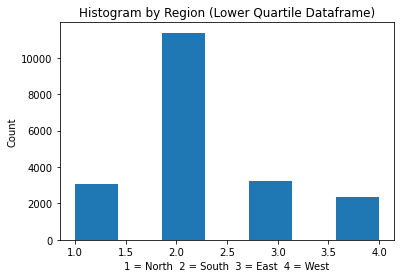

In [49]:
# clearly shows that purchase amounts falling at or below the Lower Quartile are coming mostly from the South region

plt.hist(data_lower["region"], bins=7)
plt.title("Histogram by Region (Lower Quartile Dataframe)")
plt.xlabel("1 = North  2 = South  3 = East  4 = West")
plt.ylabel("Count")
plt.show()

In [50]:
# note based on Group Meeting - scatter plots *should not* include categorical data, such as what "region" represents 

# kept for note-taking purposes, but not necessary for EDA purposes

# data_lower_sample = data_lower.sample(100)

# x_lower = data_lower_sample["region"]
# y_lower = data_lower_sample["amount"]


# plt.scatter(x_lower, y_lower, marker="o")
# plt.title("Scatterplot of Region and Amount based on Randomized Sample of Data (Lower Quartile Dataframe)")
# plt.xlabel("1 = North  2 = South  3 = East  4 = West")
# plt.ylabel("Amount")
# plt.show()

In [51]:
# kept for note-taking purposes, but not necessary for EDA purposes

# data_lower_sample = data_lower.sample(100)

# x_lower = data_lower_sample["items"]
# y_lower = data_lower_sample["amount"]


# plt.scatter(x_lower, y_lower, marker="o")
# plt.title("Scatterplot of Items and Amount based on Randomized Sample of Data (Lower Quartile Dataframe)")
# plt.xlabel("Items")
# plt.ylabel("Amount")
# plt.show()

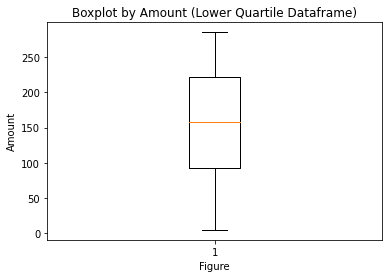

In [52]:
A_lower = data_lower["amount"]

plt.boxplot(A_lower, 0, "gD")
plt.title("Boxplot by Amount (Lower Quartile Dataframe)")
plt.xlabel("Figure")
plt.ylabel("Amount")
plt.show()

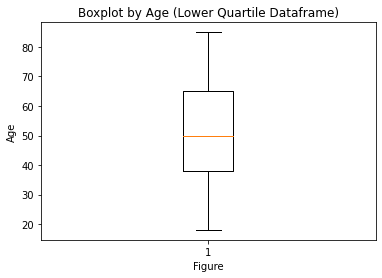

In [53]:
B_lower = data_lower["age"]

plt.boxplot(B_lower, 0, "gD")
plt.title("Boxplot by Age (Lower Quartile Dataframe)")
plt.xlabel("Figure")
plt.ylabel("Age")
plt.show()

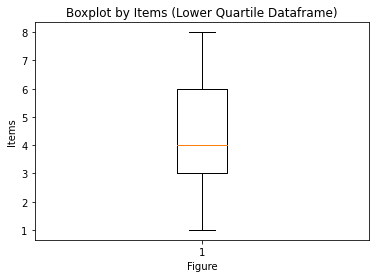

In [54]:
C_lower = data_lower["items"]

plt.boxplot(C_lower, 0, "gD")
plt.title("Boxplot by Items (Lower Quartile Dataframe)")
plt.xlabel("Figure")
plt.ylabel("Items")
plt.show()

In [55]:
# correlation graph associated with the Lower Quartile Dataframe (LQD)

data_lower.corr()

,age,items,amount,region
age,1.000000,-0.000567,-0.058764,-0.189836
items,-0.000567,1.000000,-0.003109,-0.008168
amount,-0.058764,-0.003109,1.000000,0.092465
region,-0.189836,-0.008168,0.092465,1.000000


In [56]:
# covariance graph associated with the Upper Quartile Dataframe (UQD)

data_lower.cov()

,age,items,amount,region
age,277.834251,-0.019454,-74.432198,-2.693028
items,-0.019454,4.239598,-0.486499,-0.014314
amount,-74.432198,-0.486499,5774.506051,5.980051
region,-2.693028,-0.014314,5.980051,0.724336


In [57]:
# kept for note-taking purposes, but not necessary for EDA purposes

# i just want to remember how to carry out this kind of function 

# data_lower.corrwith(data["amount"])

In [58]:
# kept for note-taking purposes, but not necessary for EDA purposes
# i just want to remember how to carry out this kind of function

# data_lower["region"].cov(data_lower["amount"])

## EDA on the (UQD) Upper Quartile Dataframe (sub-selection of the Modified Dataframe)

In [59]:
# this dataframe is generated by making a sub-selection from the Modified Dataframe
# based on a conditional statement, which seeks to find data elements where
# the amount values are greater than or equal to the upper quartile (>= 75%)

# this is done so that I can analyze data points that correspond to the uppwer-bound values asssociated with the
# "items" and amount" columns based on the "region" column 

upper_quartile = 1223.40

data_upper = data[["age", "items", "amount", "region"]][data["amount"] >= upper_quartile]
data_upper.describe()


,age,items,amount,region
count,20174.000000,20174.000000,20174.000000,20174.000000
mean,39.013731,4.508575,1909.125637,3.367453
std,12.135116,2.066605,487.264537,1.036274
min,18.000000,1.000000,1223.400000,1.000000
25%,29.000000,3.000000,1517.000000,3.000000
50%,39.000000,4.000000,1808.800000,4.000000
75%,49.000000,6.000000,2250.075000,4.000000
max,63.000000,8.000000,3000.000000,4.000000


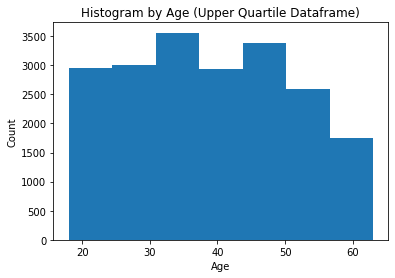

In [60]:
plt.hist(data_upper["age"], bins=7)
plt.title("Histogram by Age (Upper Quartile Dataframe)")
plt.xlabel("Age")
plt.ylabel("Count")
plt.show()

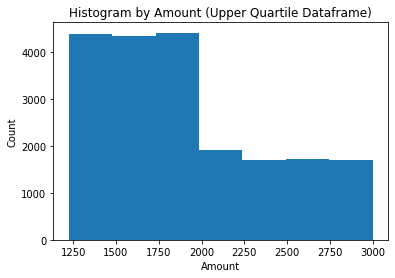

In [61]:
plt.hist(data_upper["amount"], bins=7)
plt.title("Histogram by Amount (Upper Quartile Dataframe)")
plt.xlabel("Amount")
plt.ylabel("Count")
plt.show()

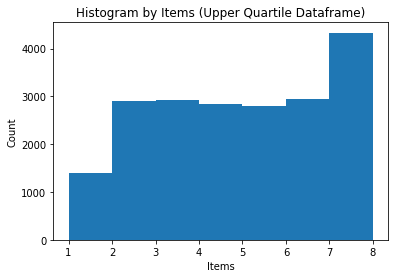

In [62]:
plt.hist(data_upper["items"], bins=7)
plt.title("Histogram by Items (Upper Quartile Dataframe)")
plt.xlabel("Items")
plt.ylabel("Count")
plt.show()

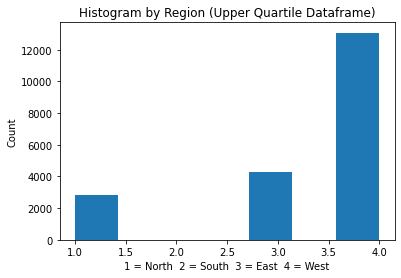

In [63]:
# clearly shows that purchase amounts greater to or equal to the Upper Quartile are coming mostly from the West region

plt.hist(data_upper["region"], bins=7)
plt.title("Histogram by Region (Upper Quartile Dataframe)")
plt.xlabel("1 = North  2 = South  3 = East  4 = West")
plt.ylabel("Count")
plt.show()

In [64]:
# note based on Group Meeting - scatter plots *should not* include categorical data, such as what "region" represents 

# # kept for note-taking purposes, but not necessary for EDA purposes

# data_upper_sample = data_upper.sample(100)

# x_upper = data_upper_sample["region"]
# y_upper = data_upper_sample["amount"]


# plt.scatter(x_upper, y_upper, marker="o")
# plt.title("Scatterplot of Region and Amount based on Randomized Sample of Data (Upper Quartile Dataframe)")
# plt.xlabel("1 = North  2 = South  3 = East  4 = West")
# plt.ylabel("Amount")
# plt.show()

In [65]:
# kept for note-taking purposes, but not necessary for EDA purposes

# data_upper_sample = data_upper.sample(100)

# x_upper = data_upper_sample["items"]
# y_upper = data_upper_sample["amount"]


# plt.scatter(x_upper, y_upper, marker="o")
# plt.title("Scatterplot of Items and Amount based on Randomized Sample of Data (Upper Quartile Dataframe)")
# plt.xlabel("Items")
# plt.ylabel("Amount")
# plt.show()

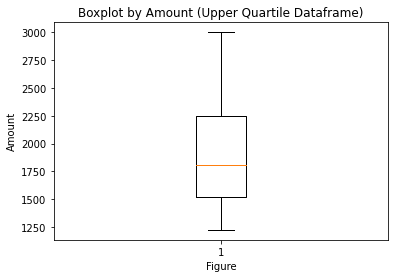

In [66]:
A_upper = data_upper["amount"]

plt.boxplot(A_upper, 0, "gD")
plt.title("Boxplot by Amount (Upper Quartile Dataframe)")
plt.xlabel("Figure")
plt.ylabel("Amount")
plt.show()

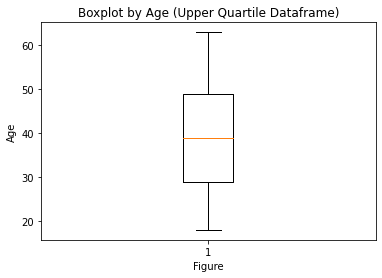

In [67]:
B_upper = data_upper["age"]

plt.boxplot(B_upper, 0, "gD")
plt.title("Boxplot by Age (Upper Quartile Dataframe)")
plt.xlabel("Figure")
plt.ylabel("Age")
plt.show()

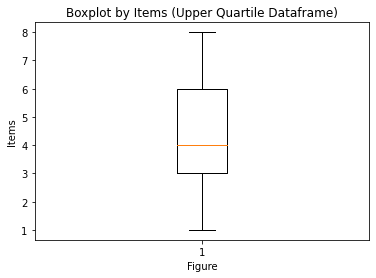

In [68]:
C_upper = data_upper["items"]

plt.boxplot(C_upper, 0, "gD")
plt.title("Boxplot by Items (Upper Quartile Dataframe)")
plt.xlabel("Figure")
plt.ylabel("Items")
plt.show()

In [69]:
# correlation graph associated with the Upper Quartile Dataframe (UQD)

data_upper.corr()

,age,items,amount,region
age,1.000000,-0.004145,0.083009,0.050785
items,-0.004145,1.000000,-0.000883,0.008378
amount,0.083009,-0.000883,1.000000,0.170863
region,0.050785,0.008378,0.170863,1.000000


In [70]:
# covariance graph associated with the Upper Quartile Dataframe (UQD)

data_upper.cov()

,age,items,amount,region
age,147.261052,-0.103945,490.833555,0.638637
items,-0.103945,4.270858,-0.888913,0.017941
amount,490.833555,-0.888913,237426.729194,86.275272
region,0.638637,0.017941,86.275272,1.073865


# Preliminary observations about the data 


## About the Modified Dataframe

##### A handful of insights can be drawn just from looking at the dataset when the describe() function is applied to it.

##### That being said, some interesting observations I noticed were:

##### 1. A majority (~85%) of purchases involved between 2 to 7 items.

##### 2. A majority (~80%) of purchases occured within the West, South and East regions. The West region being the most as having ~32% of the share.

##### 3. There's practically an even split between purchase type (in-store versus online), overall. NOTE: It's possible that there are particular age and amount tresholds which may be more associated with one purchase type over the other.

##### 4. It appears that people who are of working age (between 32 and 53) are more featured as having purchases than those who are younger or are elderly (18 and over 75) who are less featured as having purchases. 

## About the Lower Quartile Dataframe (similarities and differences with the Modified Dataframe)

##### 1. People between the ages of 30 to about 55 are highly represented

##### 2. Most purchases are on the middle and upper ends of the LQD value. Relatively few instances of purchases below $50.

##### 3. Almost equal amount of purchases are associated with between 2-item to 7-item purchases. However, 8-item purchases are occur most frequently.

##### 4. The South region appears to be most represented for LQD purchases. 

##### 5.  The "region" data and the "amount" data for the LQD have a covariance of 5.98 and a correlation of 0.09


## About the Upper Quartile Dataframe (similarities and differences with the Modified Dataframe)

##### 1. People between the ages of 30 to about 50 are highly represented, however those in the 20s and 40s brackets are effectively equal. Those in the age 60 bracket are represented much less.

##### 2. Most purchases occur within the lower bounds of the UQD value. Afterwards, the upper and highest bounds of the UQ are represented about equally.

##### 3. 1-item purchases are represented least. 2-item to 7-item purchases make up the most of total purchases and are represented about equally. 8-item purchases are most represented.

##### 4. The West region appears to be most represented for UQD purchases. The East region slightly exceeds the North region. Apparently there is no representation in the UQD from the South region.

##### 5. The "region" data and the "amount" data for the UQD have a covariance of 86.27 and a correlation of 0.17